<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [52]:
!pip install pandas
!pip install seaborn

In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 128.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 103.2 MB/s eta 0:00:00


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [39]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [40]:
## Write your code here
df = pd.DataFrame(df)
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)
df.shape

(65437, 114)

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [41]:
## Write your code here
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

ResponseId
ResponseId
False    65437
Name: count, dtype: int64

MainBranch
MainBranch
False    65437
Name: count, dtype: int64

Age
Age
False    65437
Name: count, dtype: int64

Employment
Employment
False    65437
Name: count, dtype: int64

RemoteWork
RemoteWork
False    54806
True     10631
Name: count, dtype: int64

Check
Check
False    65437
Name: count, dtype: int64

CodingActivities
CodingActivities
False    54466
True     10971
Name: count, dtype: int64

EdLevel
EdLevel
False    60784
True      4653
Name: count, dtype: int64

LearnCode
LearnCode
False    60488
True      4949
Name: count, dtype: int64

LearnCodeOnline
LearnCodeOnline
False    49237
True     16200
Name: count, dtype: int64

TechDoc
TechDoc
False    40897
True     24540
Name: count, dtype: int64

YearsCode
YearsCode
False    59869
True      5568
Name: count, dtype: int64

YearsCodePro
YearsCodePro
False    51610
True     13827
Name: count, dtype: int64

DevType
DevType
False    59445
True      5992
Name: count, dty

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [42]:
## Write your code here
import numpy as np
df['CodingActivities'].replace(np.nan,'Hobby', inplace = True) 
print('CodingActivities')
print (df['CodingActivities'].isnull().value_counts())

CodingActivities
CodingActivities
False    65437
Name: count, dtype: int64


/tmp/ipykernel_301/1350862685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].replace(np.nan,'Hobby', inplace = True)


In [43]:
df_ccy_mean = df['ConvertedCompYearly'].mean()
df_ccy_mean
df['ConvertedCompYearly'].replace(np.nan,df_ccy_mean, inplace = True) 
df['ConvertedCompYearly'].isnull().value_counts()

/tmp/ipykernel_301/3330228792.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].replace(np.nan,df_ccy_mean, inplace = True)


ConvertedCompYearly
False    65437
Name: count, dtype: int64

In [46]:
df['ConvertedCompYearly'].value_counts()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,86155.287263,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,86155.287263,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,86155.287263,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,86155.287263,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86155.287263,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,86155.287263,NaN


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [47]:
## Write your code here
df['ConvertedCompYearly']

0        86155.287263
1        86155.287263
2        86155.287263
3        86155.287263
4        86155.287263
             ...     
65432    86155.287263
65433    86155.287263
65434    86155.287263
65435    86155.287263
65436    86155.287263
Name: ConvertedCompYearly, Length: 65437, dtype: float64

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


/tmp/ipykernel_301/153618286.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm['ConvertedCompYearly'])


<Axes: xlabel='ConvertedCompYearly', ylabel='Density'>

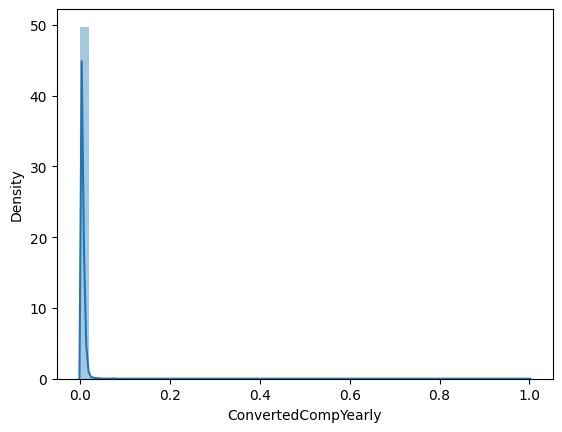

In [55]:
## Write your code here
df_norm = df.copy()
df_norm['ConvertedCompYearly'] = (df_norm['ConvertedCompYearly'] - df_norm['ConvertedCompYearly'].min()) / (df_norm['ConvertedCompYearly'].max() - df_norm['ConvertedCompYearly'].min()) 


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [60]:
## Write your code here
def z_score_normalization(normalized_data):
    mean = np.mean(df['ConvertedCompYearly'])
    std_dev = np.std(df['ConvertedCompYearly'])
    normalized_data = (df['ConvertedCompYearly'] - mean) / std_dev
    return normalized_data

z_score_normalization(df['ConvertedCompYearly'])

0        1.302062e-16
1        1.302062e-16
2        1.302062e-16
3        1.302062e-16
4        1.302062e-16
             ...     
65432    1.302062e-16
65433    1.302062e-16
65434    1.302062e-16
65435    1.302062e-16
65436    1.302062e-16
Name: ConvertedCompYearly, Length: 65437, dtype: float64

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


/tmp/ipykernel_301/189484527.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm['ConvertedCompYearly'])


<Axes: xlabel='ConvertedCompYearly', ylabel='Density'>

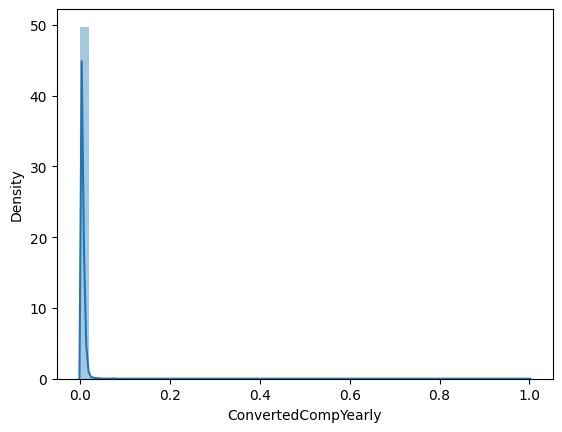

In [56]:
## Write your code here
sns.distplot(df_norm['ConvertedCompYearly'])

/tmp/ipykernel_301/1630904273.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedCompYearly'])


<Axes: xlabel='ConvertedCompYearly', ylabel='Density'>

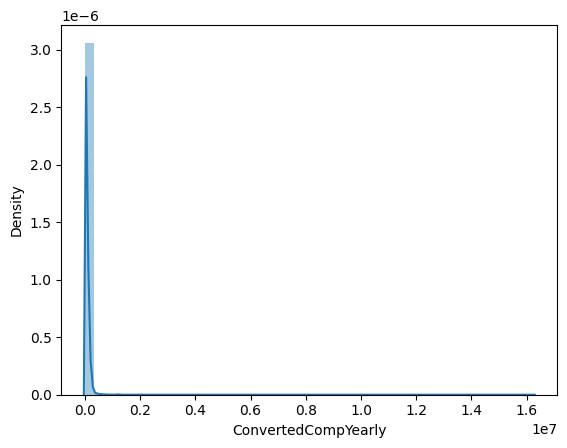

In [57]:
sns.distplot(df['ConvertedCompYearly'])

In [ ]:
sns.distplot(df_norm['ConvertedCompYearly'])

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
